# Exploratory data analysis of todostuslibros.com book data

This notebooks reads scraped book data from the site www.todostuslibros.com and performs an exploratory data analysis of the available features. 

## Description of the data

The [scrapy project](https://github.com/ladywithanermine/ermine-book-data-scraping) used to crawl the data generates a JSON file for a list of aggregated categories (genres) from the site:

- Modern literary fiction
- Mistery and crime
- Suspense and terror
- Science fiction
- Historical fiction
- Romance

The structure of the generated JSON files is the following:

- **title**: title of the book.
- **author**: author(s) of the book.
- **publisher**: publishing house.
- **isbn**: international standard book number [ISBN](https://en.wikipedia.org/wiki/International_Standard_Book_Number).
- **price**: price of the book in Euros.
- **binding**: type of binding/edition. This feature includes hardcover, paperback, e-books, etc.
- **publishing_country**: country where this edition of the book was published.
- **publishing_language**: language of this edition of the book.
- **original_language**: original language of the book.
- **ean**: European Article Number [EAN](https://es.wikipedia.org/wiki/European_Article_Number).
- **publication_date**: date of publication (dd/MM/YYYY).
- **num_pages**: number of pages.
- **img_url**: URL for the cover image.
- **tags**: tags associated to the book in the website. They may refer to the genre, but also to the language (if it is not Spanish) or other custom categories.
- **bookstores_number**: number of bookstores where the book if available, at the time of the crawling. The bookstores used for the count are those affiliated to the Cegal association and they are listed [here](https://www.todostuslibros.com/librerias).
- **synopsis**: book synopsis and/or blurbs.

There are several things to take into account before diving in the data:

- Some books may belong to more than one category ('literary fiction' and 'crime', for instance). The generated JSON files relate to the actual category search, so some books may be duplicated in the complete dataset. In order to keep track of the original *genre* for each book, a new column will be generated with the genres from the previous aggregation list.
- The taxonomy of the list of tags, binding types and other categorical data is not know (it is not documented on the site). It will thus be inferred from the data itself. A quick preliminary study performed while developing the crawler showed that some tags have very similar names. This is consistent with the hypothesis that category tags are assigned by free writing labels (either they don't come from a predesigned taxonomy or the taxonomy has freely evolved over time).

## Imports

In [119]:
import glob
import pandas as pd
from datetime import datetime
import re
from wordcloud import WordCloud

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

## Read the data
We will read all the JSON files and join them in a single pandas dataframe to perform the analysis. For all rows in each JSON file, an aggregation tag will be assigned, based on the name of the file, which relates to the genre.

In [16]:
file_pattern = '../data/todostuslibros_*.json'
json_files = glob.glob(file_pattern)
json_files

['../data/todostuslibros_fiction.json',
 '../data/todostuslibros_mistery_crime.json',
 '../data/todostuslibros_scifi.json',
 '../data/todostuslibros_terror_suspense.json',
 '../data/todostuslibros_fantasy.json',
 '../data/todostuslibros_historical_fiction.json',
 '../data/todostuslibros_romance.json']

In [19]:
df = pd.DataFrame()

for json_file in json_files:
    cat_name = re.findall(r'..\/data\/todostuslibros_(.*).json', json_file)[0]
    df_json = pd.read_json(json_file, orient='records')
    df_json.loc[:, 'aggregation'] = cat_name
    df = df.append(df_json)
    
df.head()

,title,author,publisher,isbn,price,binding,publishing_country,publishing_language,original_language,ean,publication_date,num_pages,img_url,tags,bookstores_number,aggregation,synopsis
0,Estrellas negras,"Kapuscinski, Ryszard",Editorial Anagrama,9788433936929,NaN,Libro electrónico,España,Español,Polish,9788433936929,17-02-2016,224.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],0,fiction,NaN
1,Locos de cine y otros relatos,"Pérez Rubio, Pablo",Editorial la Fragua del Trovador,9788415044758,NaN,Tapa blanda o Bolsillo,España,Español,Español,9788415044758,25-03-2017,176.0,None,[Ficción moderna y contemporanea],0,fiction,NaN
2,Pasiones romanas,"Janer, Maria de la Pau",Editorial Planeta,9788408063117,21.00,Cartoné,España,Español,Español,9788408063117,08-11-2005,452.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],9,fiction,NaN
3,Los 7 soles de la felicidad,"Sanz Cañas, Esther",Umbriel,9788489367920,5.95,Tapa blanda o Bolsillo,España,Español,,9788489367920,07-02-2011,288.0,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],1,fiction,NaN
4,Pack don Quijote + invitación al Quijote,AA. VV.,Lunwerg Editores,9788497851756,9.95,Cartoné,España,Español,,9788497851756,29-05-2007,1544.0,https://static.cegal.es/imagenes/marcadas/9788...,"[Ficción moderna y contemporanea, Ficción clás...",0,fiction,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135285 entries, 0 to 18310
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   title                135285 non-null  object 
 1   author               134095 non-null  object 
 2   publisher            135285 non-null  object 
 3   isbn                 135285 non-null  int64  
 4   price                66179 non-null   float64
 5   binding              127452 non-null  object 
 6   publishing_country   135285 non-null  object 
 7   publishing_language  135285 non-null  object 
 8   original_language    135285 non-null  object 
 9   ean                  135285 non-null  int64  
 10  publication_date     135285 non-null  object 
 11  num_pages            115764 non-null  float64
 12  img_url              101319 non-null  object 
 13  tags                 135285 non-null  object 
 14  bookstores_number    135285 non-null  int64  
 15  aggregation       

### Format data types
Most of the columns from the dataset are related to descriptive qualities (thus, qualitative features), such as the type of binding, the publishing country or the language. Numerical features include the `price` and the `bookstores_number`.

- The `isbn` column is a unique identifier and it could be an appropriate index for the dataframe, once we have checked there are no duplicates. We will convert it to string, as it is not additive, nor it represents a numeric variable.
- The `ean` column relates to the [European Article Number](https://en.wikipedia.org/wiki/International_Article_Number) system. In 2007, a 13 digit ISBN number system was deployed, in order to match the EAN system. Thus, we would expect the ISBN column to have the same values as the EAN.
- The `tags` column includes all tags associated with the book in the website as a list.
- The `publication_date` is a date string with the format dd/MM/YYYY. When converting the string to timestamp, an exception is thrown for empty string values, so it's necessary to include a condition to transform empty strings to NaN.

In [21]:
df.loc[:, 'isbn'] = df.isbn.astype('string')
df.loc[:, 'ean'] = df.ean.astype('string')
df.loc[:, 'publication_date'] = df.publication_date.apply(lambda x: datetime.strptime(x, '%d-%m-%Y') if x else None)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135285 entries, 0 to 18310
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   title                135285 non-null  object        
 1   author               134095 non-null  object        
 2   publisher            135285 non-null  object        
 3   isbn                 135285 non-null  string        
 4   price                66179 non-null   float64       
 5   binding              127452 non-null  object        
 6   publishing_country   135285 non-null  object        
 7   publishing_language  135285 non-null  object        
 8   original_language    135285 non-null  object        
 9   ean                  135285 non-null  string        
 10  publication_date     133759 non-null  datetime64[ns]
 11  num_pages            115764 non-null  float64       
 12  img_url              101319 non-null  object        
 13  tags           

## Exploratory data analysis
The exploratory data analysis will start by looking at the numerical and categorical features independently, to proceed with the study of the relationships between features (correlation, etc.).

In [24]:
types_df = df.dtypes.reset_index()
types_df.rename(columns={0: "type"}, inplace=True)
types_df

,index,type
0,title,object
1,author,object
2,publisher,object
3,isbn,string
4,price,float64
5,binding,object
6,publishing_country,object
7,publishing_language,object
8,original_language,object
9,ean,string


### Univariate analysis

#### Numerical features
The dataset has only 3 numerical features:

- `price`
- `num_pages`
- `bookstores_number`


In [25]:
quantitative_vars_df = types_df[(types_df['type']=='float64') | (types_df['type']=='int64')]
quantitative_vars = list(quantitative_vars_df['index'].to_numpy())
quantitative_vars

['price', 'num_pages', 'bookstores_number']

In [26]:
quantitative_df = df.loc[:, quantitative_vars]
quantitative_df.head()

,price,num_pages,bookstores_number
0,NaN,224.0,0
1,NaN,176.0,0
2,21.00,452.0,9
3,5.95,288.0,1
4,9.95,1544.0,0


In [27]:
quantitative_df.describe()

,price,num_pages,bookstores_number
count,66179.000000,115764.000000,135285.000000
mean,15.007999,305.773142,53.884451
std,6.861510,182.477628,89.627644
min,0.010000,1.000000,0.000000
25%,9.950000,178.000000,0.000000
50%,15.000000,280.000000,0.000000
75%,18.950000,392.000000,80.000000
max,226.920000,6121.000000,555.000000


A quick look at the distribution via the histogram or the percentiles shows that most of the books are not available in any library. It is useful to take a look at the `bookstores_number` distribution removing the 0 values, to find out that it is approximately centered around a mean of some 220 bookstores, with still a long tail of books available at just one bookshop.

The `price` distibution is centered around 15€ with a slightly long tail towards the 100€ and the `num_pages`, around 280 pages, with a short tail of very long books. It will be interesting to study ahead (see Multivariate analysis) the dependency between the number of pages and some categorical variables, such as type of binding or 'genre', as expressed in the `aggregation` or in the `tags` column. 

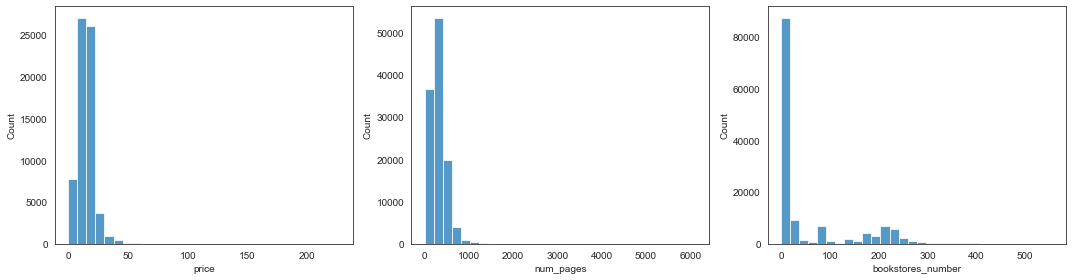

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for col, ax in zip(quantitative_vars, axes):
    sns.histplot(quantitative_df[col], bins=30, ax=ax)

plt.tight_layout() 
plt.show();

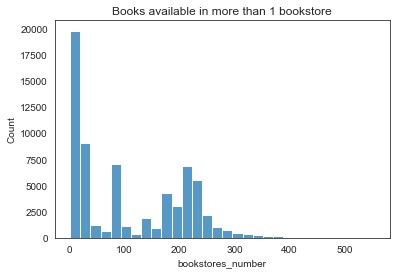

In [29]:
df_bookstores_number = df.loc[df['bookstores_number']>0, 'bookstores_number']
sns.histplot(df_bookstores_number, bins=30)
plt.title('Books available in more than 1 bookstore');

The boxplots provide a different view into the same findings: some 'outliers' with more than 1000 pages and a standard price just below 20€. The bookstores number distribution is, of course, made of values equal or above zero.

In [ ]:
# ESTO NO TERMINA
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for col, ax in zip(quantitative_vars, axes):
    sns.boxplot(data=quantitative_df[col], ax=ax)
    ax.set_title(col)
    
plt.tight_layout() 
plt.show();

#### Qualitative features
Some of the categorical features, like `title`, `author`, `img_url`, `synopsis` or `publisher`, may have a great number of different values (in the case of `title`, there could be duplicates related to different editions of the same text, such as hardcover and paperback). `isbn` and `ean`, on the other hand, are supposedly unique identifiers --it is yet to be verified that there are no duplicates of these columns in the dataset.

The variables we could understand as real categorical features (belonging to a somewhat limited catalog of values) are the following:

- `binding`
- `publishing_country`
- `publishing_language`
- `original_language`
- `tags`, considered individually
- `aggregation`


In [31]:
qualitative_vars_df = types_df[(types_df['type']=='object') | (types_df['type']=='string')]
qualitative_vars = list(qualitative_vars_df['index'].to_numpy())
qualitative_vars

['title',
 'author',
 'publisher',
 'isbn',
 'binding',
 'publishing_country',
 'publishing_language',
 'original_language',
 'ean',
 'img_url',
 'tags',
 'aggregation',
 'synopsis']

In [33]:
qualitative_df = df[qualitative_vars]
qualitative_df.head()

,title,author,publisher,isbn,binding,publishing_country,publishing_language,original_language,ean,img_url,tags,aggregation,synopsis
0,Estrellas negras,"Kapuscinski, Ryszard",Editorial Anagrama,9788433936929,Libro electrónico,España,Español,Polish,9788433936929,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],fiction,NaN
1,Locos de cine y otros relatos,"Pérez Rubio, Pablo",Editorial la Fragua del Trovador,9788415044758,Tapa blanda o Bolsillo,España,Español,Español,9788415044758,None,[Ficción moderna y contemporanea],fiction,NaN
2,Pasiones romanas,"Janer, Maria de la Pau",Editorial Planeta,9788408063117,Cartoné,España,Español,Español,9788408063117,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],fiction,NaN
3,Los 7 soles de la felicidad,"Sanz Cañas, Esther",Umbriel,9788489367920,Tapa blanda o Bolsillo,España,Español,,9788489367920,https://static.cegal.es/imagenes/marcadas/9788...,[Ficción moderna y contemporanea],fiction,NaN
4,Pack don Quijote + invitación al Quijote,AA. VV.,Lunwerg Editores,9788497851756,Cartoné,España,Español,,9788497851756,https://static.cegal.es/imagenes/marcadas/9788...,"[Ficción moderna y contemporanea, Ficción clás...",fiction,NaN


Let's study the distribution of the categorical variables:

In [34]:
categorical_vars = ['binding', 'publishing_country', 'publishing_language', 'original_language', 'aggregation']
categorical_df = df.loc[:, categorical_vars]
categorical_df.head()

,binding,publishing_country,publishing_language,original_language,aggregation
0,Libro electrónico,España,Español,Polish,fiction
1,Tapa blanda o Bolsillo,España,Español,Español,fiction
2,Cartoné,España,Español,Español,fiction
3,Tapa blanda o Bolsillo,España,Español,,fiction
4,Cartoné,España,Español,,fiction


It is noticeable that there are no NaN values as such for these features, but all of them have occurrences with the empty string, which could be considered the None value for these features. The `aggregation` column, as it is synthetically generated during the data loading, has no NaN whatsoever.

In the case of `publishing_language` and `original_language` it is also important to notice that the top two values are 'Español' and 'Castellano', that are in fact the same language. The value 'No determinado' (unspecified) for language could also be considered a NaN.

In [35]:
for catvar in categorical_vars:
    print('******** Value counts for feature:', catvar)
    print(categorical_df[catvar].value_counts())

******** Value counts for feature: binding
Tapa blanda o Bolsillo          76403
Libro electrónico               32950
Cartoné                          9573
Libro                            3581
                                 3252
Libro en otro formato             800
Archivo de audio descargable      514
Recurso en línea                  213
CD-Audio                           70
Piel / Lujo                        36
Espiral                            16
Folleto                             6
Mapa en hojas                       4
Carpeta                             4
Disco audio                         4
Libro de tela                       4
CD-ROM                              4
Libro de cartón                     3
DVD Audio                           2
Tarjetas                            2
Producto multisoporte               2
Película o transparencia            2
Audio                               1
Audiocasete                         1
Fascículo                           1
Memoria

##### `Tags` feature
Let's take a detailed of at the `tags` column and the individual tags frequencies:

In [93]:
df_tags = df.explode('tags')
df_tags.head()

,title,author,publisher,isbn,price,binding,publishing_country,publishing_language,original_language,ean,publication_date,num_pages,img_url,tags,bookstores_number,aggregation,synopsis
0,Estrellas negras,"Kapuscinski, Ryszard",Editorial Anagrama,9788433936929,NaN,Libro electrónico,España,Español,Polish,9788433936929,2016-02-17,224.0,https://static.cegal.es/imagenes/marcadas/9788...,Ficción moderna y contemporanea,0,fiction,NaN
1,Locos de cine y otros relatos,"Pérez Rubio, Pablo",Editorial la Fragua del Trovador,9788415044758,NaN,Tapa blanda o Bolsillo,España,Español,Español,9788415044758,2017-03-25,176.0,None,Ficción moderna y contemporanea,0,fiction,NaN
2,Pasiones romanas,"Janer, Maria de la Pau",Editorial Planeta,9788408063117,21.00,Cartoné,España,Español,Español,9788408063117,2005-11-08,452.0,https://static.cegal.es/imagenes/marcadas/9788...,Ficción moderna y contemporanea,9,fiction,NaN
3,Los 7 soles de la felicidad,"Sanz Cañas, Esther",Umbriel,9788489367920,5.95,Tapa blanda o Bolsillo,España,Español,,9788489367920,2011-02-07,288.0,https://static.cegal.es/imagenes/marcadas/9788...,Ficción moderna y contemporanea,1,fiction,NaN
4,Pack don Quijote + invitación al Quijote,AA. VV.,Lunwerg Editores,9788497851756,9.95,Cartoné,España,Español,,9788497851756,2007-05-29,1544.0,https://static.cegal.es/imagenes/marcadas/9788...,Ficción moderna y contemporanea,0,fiction,NaN


There is a total of 1008 tags, where the most common is 'Ficción moderna y contemporanea' (modern and contemporary fiction).

In [98]:
df_tags.tags.describe()

count                              201656
unique                               1008
top       Ficción moderna y contemporanea
freq                                85525
Name: tags, dtype: object

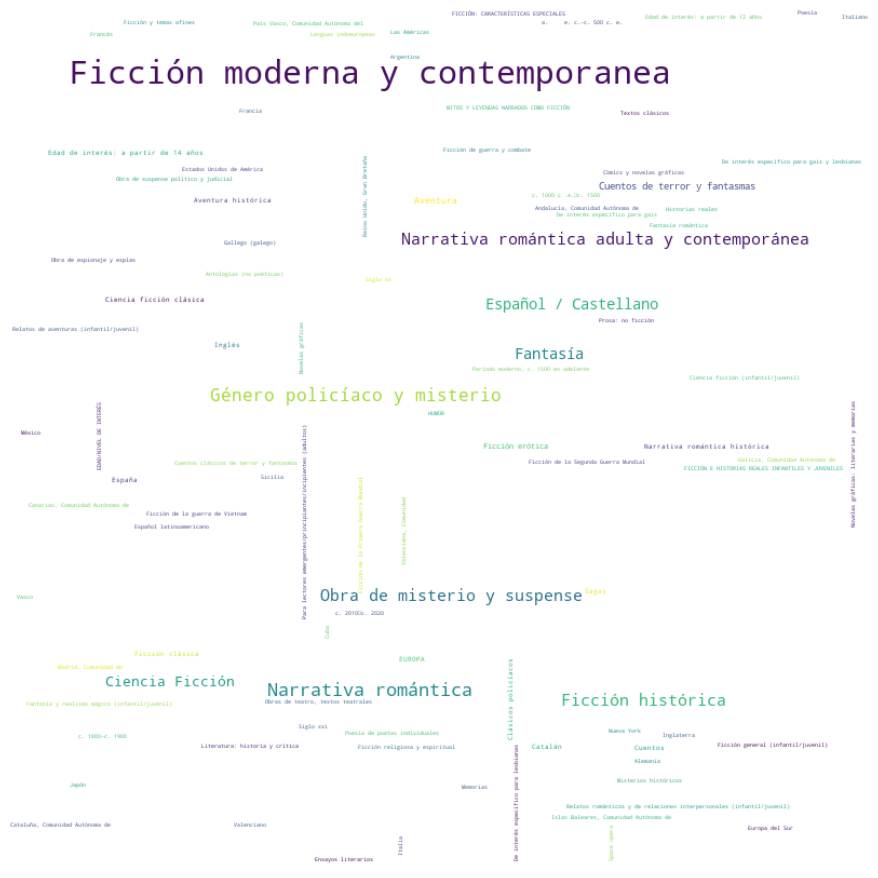

In [134]:
data = df_tags['tags'].value_counts().to_dict()
word_cloud = WordCloud(width = 800, height = 800, background_color='white', max_words=100).generate_from_frequencies(data)
plt.figure(figsize=(12, 12), facecolor = 'white', edgecolor='blue')
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

#### Datetime features
`publication_date` is the only datetime feature of the dataset. 

A study of this feature may allow us to investigate the number of books published by date (month/year), from an univariate point of view. If we take into account other features we may dive into the distribution of published books per genre and date/month/year and others (see the Multivariate analysis section).

In [70]:
df_datetime = df[['publication_date']].copy()
df_datetime.loc[:, 'day_of_month'] = df_datetime.publication_date.dt.day
df_datetime.loc[:, 'month'] = df_datetime.publication_date.dt.month
df_datetime.loc[:, 'year'] = df_datetime.publication_date.dt.year
df_datetime.head()

,publication_date,day_of_month,month,year
0,2016-02-17,17.0,2.0,2016.0
1,2017-03-25,25.0,3.0,2017.0
2,2005-11-08,8.0,11.0,2005.0
3,2011-02-07,7.0,2.0,2011.0
4,2007-05-29,29.0,5.0,2007.0


A pairplot of datetime-related variables gives us some insights into the distribution of books published by month. January and October are the months with more books published. October coincides with the classical literary *rentrée* after the summer.

The concentration of publication dates around 2019 is quite an indicative of the availability of just very recently published books in the bookshops. The Spanish book industry (as it's mostly the case around the globe) is one caracterized by its speed of change: a new book usually only lasts a few weeks on the 'new releases' shelves.

<Figure size 936x1152 with 0 Axes>

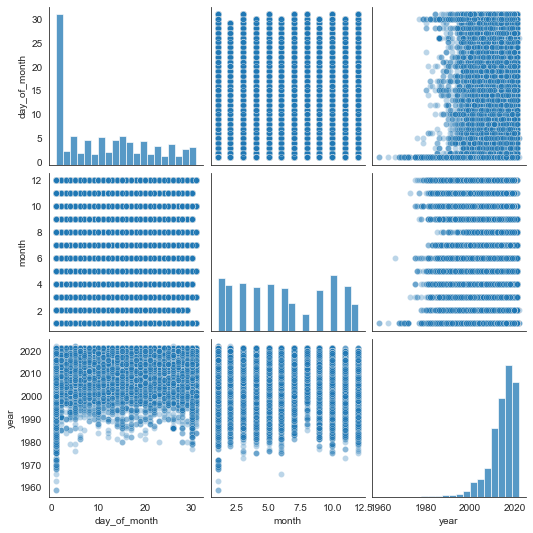

In [71]:
plt.figure(figsize=(13,16))
sns.pairplot(df_datetime, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.3}, diag_kws={'bins':20});

In [74]:
df_datetime_grouped = df_datetime.groupby('publication_date').count()
df_datetime_grouped.head()

,day_of_month,month,year
publication_date,,,
1959-01-01,2,2,2
1963-01-01,1,1,1
1966-06-01,1,1,1
1968-01-01,3,3,3
1969-01-01,3,3,3


Here is a lineplot depicting the books by date time series:

<AxesSubplot:xlabel='publication_date', ylabel='month'>

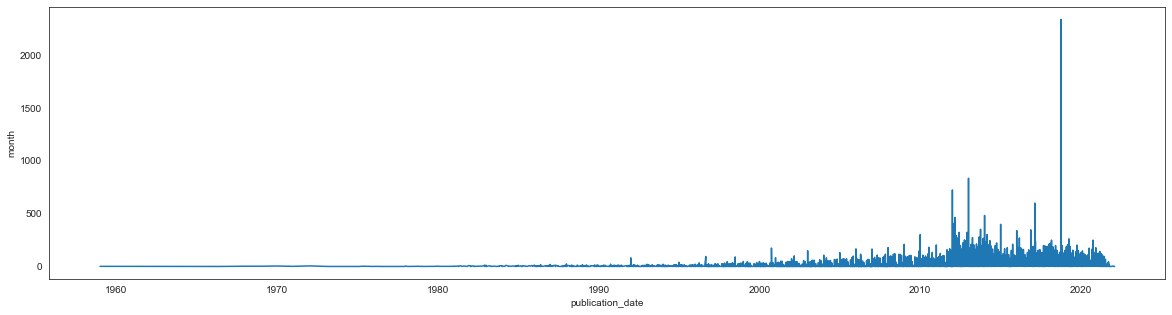

In [69]:
plt.figure(figsize=(20,5))
sns.lineplot(x='publication_date', y='month', data=df_datetime_grouped.reset_index())

The following plot studies the distribution of published books along the days of the month:

In [82]:
df_datetime_month = df_datetime.groupby(['month', 'day_of_month']).agg({'publication_date': 'count'}).reset_index()
df_datetime_month.head()

,month,day_of_month,publication_date
0,1.0,1.0,5897
1,1.0,2.0,170
2,1.0,3.0,130
3,1.0,4.0,175
4,1.0,5.0,166


A heatmap of published books by day of the month highlights what was already visible in the pairplot: most of the books published are released on the first day of the month. The second more important date in the month is around the 15th. This heatmap also shows the relevance of January and October for the book industry, followed by March. The summer months (July and, specially, August) are particularly short of published books.

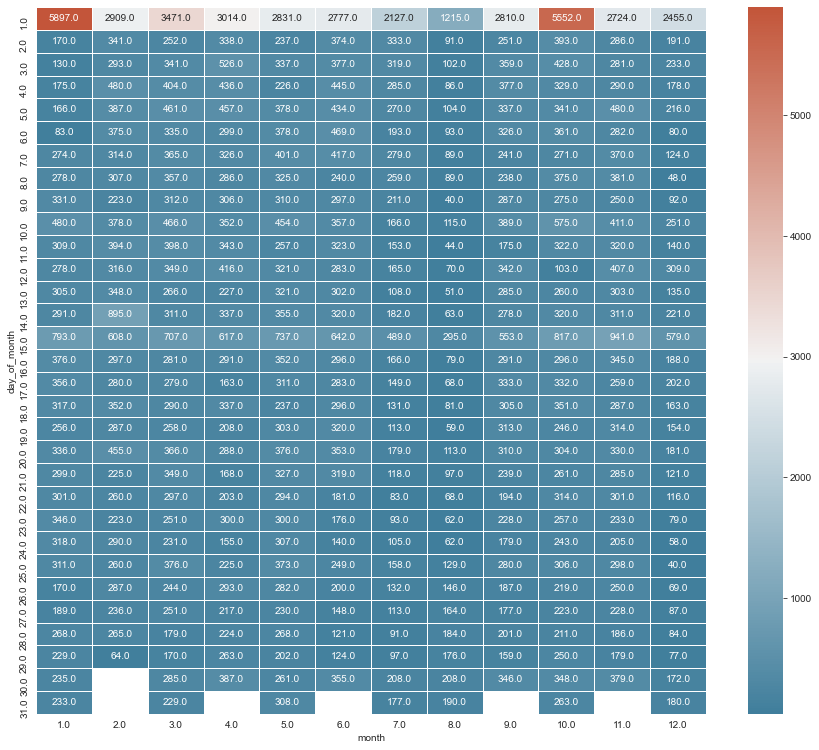

In [90]:
df_datetime_pivot = df_datetime_month.pivot("day_of_month", "month", "publication_date")

cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(15, 13))
sns.heatmap(df_datetime_pivot, annot=True, fmt='', linewidths=.5, ax=ax, cmap=cmap);

### Multivariate analysis

<Figure size 936x1152 with 0 Axes>

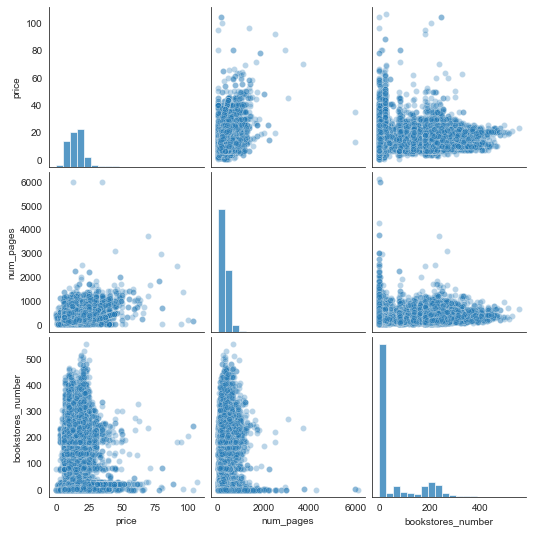

In [158]:
plt.figure(figsize=(13,16))
sns.pairplot(quantitative_df, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.3}, diag_kws={'bins':20});

### Null values
- A few columns have NaN values in case the information is not available in the web site. That applies to `price`. 
- Other columns list an empty string (`original_language`, `publication_date`) or a 'None' (`img_url`) in case the information is not available.
- The variable `bookstores_number` has the value 0 when the book is not available in any of the bookshops associated with the web site.